<a href="https://colab.research.google.com/github/BoYeonJang/ICT-AI-education/blob/main/(8%EC%9B%94%2012%EC%9D%BC)%20%EC%8B%A4%EC%8A%B5%EC%9D%84%20%ED%86%B5%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%ED%95%9C%EB%B2%88%EC%97%90%20%EB%81%9D%EB%82%B4%EA%B8%B0/1_%EB%AA%A8%EB%91%90%EC%9D%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

# 실습을 위한 데이터 스케일링 및 학습셋, 데이터셋 준비

- 딥러닝의 경우 가중치 조절을 통해 불필요한 속성을 스스로 제거하려는 성질이 있으나 일반적으로 머신러닝을 두드러진 몇 개의 값이 결과에 큰 영향을 미치기 때문에 데이터 전처리 과정이 중요
- 데이터 전처리 과정을 데이터 스케일링(data scaling)이라고 하고, 일반적으로 많이 사용하는 StandardScaler()함수를 이용

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# DataSet

df = pd.read_csv('pima-indians-diabetes.csv')

In [5]:
# 세부 정보를 X로 지정, 당뇨병 여부를 y로 지정

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

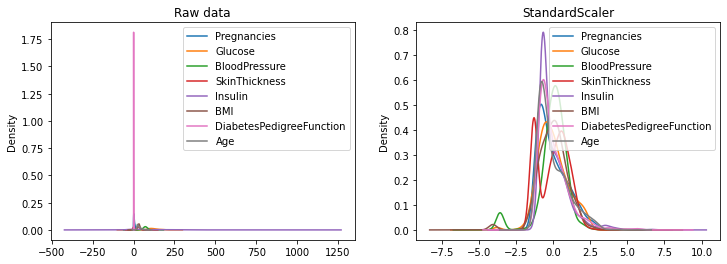

In [6]:
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
X.plot(kind = 'kde', title = 'Raw data', ax = ax[0])
scaled_X.plot(kind = 'kde', title = 'StandardScaler', ax = ax[1])
# Kernel Density Estimation
# 커널함수(kernel function)에 대한 이해가 필요한데 수학적으로 커널함수는 
# 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수로 정의되며 
# 가우시언(Gaussian), uniform 함수 등이 대표적인 커널 함수

plt.show()

In [7]:
# 학습셋과 테스트셋을 75:25의 비율로 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

- 사이킷런 라이브러리에서 적절한 알고리즘을 불러서 사용
- fit() 함수로 학습
- predict() 함수로 예측

## 결정 트리(Decision Tree)

- 예/아니오 라는 답이 

In [8]:
# 결정 트리 분류기 호출
from sklearn.tree import DecisionTreeClassifier

# 학습 환경 설정
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.05 %
Standard Deviation: 4.43 %


## 랜덤 포레스트(Random Forest)

- 결정 트리를 여러개 묶어 놓은 것
- 많은 결정 트리를 수행해 그로부터 나온 분류 결과를 취합하여 최종 예측
- 너무 단순한 원리로 과적합에 빠지기 쉬운 결정트리의 단점을 보완

In [9]:
# 랜덤 포레스트 분류기 호출
# 앙상블 기법
from sklearn.ensemble import RandomForestClassifier

# 학습 환경 설정, : 결정 트리 개수
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.78 %
Standard Deviation: 4.03 %


## 가우시안 나이브 베이즈(gaussian naive bayes)

- 속성이 연속형 변수일 때 베이즈 정리를 기반으로 각 범주에 속할 확률을 계산
- 예시) 키를 측정해서 남성인지 여성인지 예측하는 문제에서 남성의 키와 여성의 키 평균과 표준편차 값이 있을 때, 목표 데이터가 각 범주에 속할 확률을 계산하여 가장 높은 확률의 범주로 데이터를 분류함

In [10]:
# 가우시안 나이브 베이즈 분류기 호출
from sklearn.naive_bayes import GaussianNB

# 학습 환경 설정
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.15 %
Standard Deviation: 5.91 %


## K-최근접 이웃(k-nearest neighbor)

- 새로운 데이터가 입력되면 가장 가까이 있는 것을 중심으로 새로운 데이터 종류를 정해주는 것
- 예) 새로운 데이터가 입력되었을 때 이 데이터가 붉은 원인지 푸른 원인지를 예측
- 주변 데이터의 수를 k라 하고, k = 3일 때 원이 붉은 원인지 푸른 원인지 판단
- 경우에 따라 k인 값을 조절해가며 결정

In [11]:
# K-최근접 이웃 호출
from sklearn.neighbors import KNeighborsClassifier

# 학습 환경 설정
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.27 %
Standard Deviation: 7.29 %


## 에이다 부스트(ada boost)

In [12]:
# 에이다 부스트 호출
from sklearn.ensemble import AdaBoostClassifier

# 학습 환경 설정
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.70 %
Standard Deviation: 3.32 %


## 이차 판별 분석(quadratic discriminant analysis)

- 각 클래스 분포의 중심과 모양을 결정
- 이들 클래스 사이의 경계를 그린 후 경계가 직선이면 선형 판별을, 곡성이면 2차 방정식의 판별 분석을 함

In [13]:
# 이차 판별 분석 호출
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 학습 환경 설정
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.02 %
Standard Deviation: 4.22 %


## 서포트 벡터 머신(support vector machine)

- 분류를 위한 기준선을 정의하는 모델
- 경계선을 만들고 공간의 마진이 최대화되는 경계를 찾아 분류

In [14]:
# 서포트 벡터 머신 호출
from sklearn.svm import SVC

# 학습 환경 설정
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.69 %
Standard Deviation: 1.35 %


## 서포트 벡터 머신 - RBF 커널(support vector machine using radial baise functions kernel)

- 주어진 데이터가 **선형으로 분리될 수 없는 경우** 사용
- 3차원 공간을 이용
- 커널이란 주어진 데이터를 고차원의 공간으로 새롭게 위치시키는 방법
- RBF(방사형) 커널

In [15]:
# 서포트 벡터 머신 호출
from sklearn.svm import SVC

# 학습 환경 설정
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.48 %
Standard Deviation: 6.72 %


## 보팅

- 여러가지 다른 유형의 알고리즘을 같은 데이터셋에 적용하여 학습
- 학습 결과를 모아 다수의 분류기 

In [16]:
# 보팅 호출
from sklearn.ensemble import VotingClassifier

# 학습 환경 설정
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel = 'linear')

classifier = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.34 %
Standard Deviation: 4.99 %


## 배깅

- 데이터셋을 여러 개로 분리 및 분류하여 단일 알고리즘에 적용
- 부스팅과 다른 점은 각 분류기를 제각각 따로따로 분류한다는 점
- 단일 분류기를 여러 번 사용함으로써 정확도를 높이고 과적합을 방지하는 효과가 있음

In [18]:
# 보팅 호출
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# 학습 환경 설정
classifier = BaggingClassifier(base_estimator = SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.34 %
Standard Deviation: 3.32 %


# 여러 알고리즘의 성능을 한눈에 비교하기

In [31]:
# 사용한 분류기를 모두 지정
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    VotingClassifier(estimators=[
        ('1', AdaBoostClassifier()), 
        ('2', RandomForestClassifier()),
        ('3', SVC(kernel='linear'))]),
    BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0),
]

In [32]:
# 각 분류기 이름 저장
classifier_names = [
    'D_tree',
    'RF',
    'GNB',
    'KNN',
    'SVM_I',
    'SVM_K',
    'Ada',
    'QDA',
    'Voting',
    'Bagging'
]

In [35]:
# 결과가 저장 될 리스트 만들기
# 초기화 시켜주기
modelaccuracies = []
modelnames = []
modelmeans = []

In [36]:
# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifiers)

for classifier_name, classifier in classifier_data:
  # 계층별 교차 검증 환경 설정
  skf = StratifiedKFold(n_splits=10, shuffle=True)
  # 교차 검증을 통해 정확도 계산
  accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf)

  # 정확도의 평균값 출력
  print('Mean accuracy of', classifier_name, ': {:.2f} %'.format(accuracies.mean()*100))

  # 결과 저장
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

Mean accuracy of D_tree : 68.77 %
Mean accuracy of RF : 74.64 %
Mean accuracy of GNB : 74.82 %
Mean accuracy of KNN : 68.73 %
Mean accuracy of SVM_I : 76.37 %
Mean accuracy of SVM_K : 74.28 %
Mean accuracy of Ada : 74.29 %
Mean accuracy of QDA : 73.59 %
Mean accuracy of Voting : 73.07 %
Mean accuracy of Bagging : 75.51 %


<BarContainer object of 10 artists>

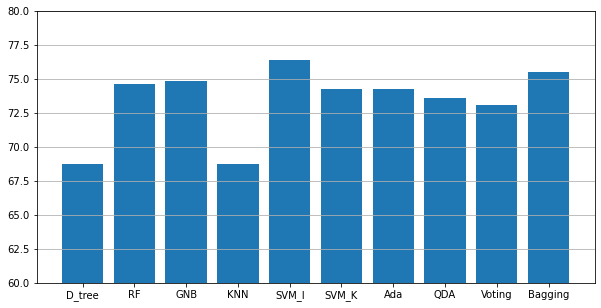

In [44]:
# 분류기 별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([60, 80])
plt.grid(True, axis='y')
plt.bar(modelnames, modelmeans)

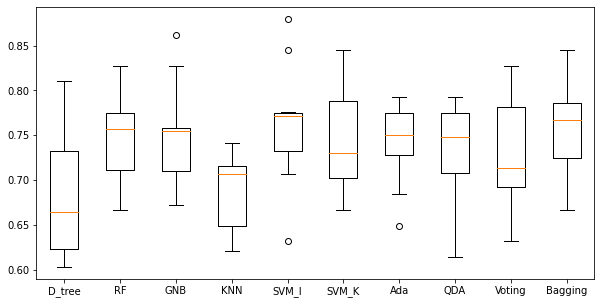

In [45]:
# 분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
# “111”은 “1×1 그리드, 첫 번째 서브 플롯”을 의미하고, “234”는 “2×3 그리드, 네 번째 서브 플롯”을 의미
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()